### Lloyd Villanueva

### Numerical Methods II Exam

2. NDA question

(a) Average the input (monthly) air temperature data to obtain annual means.

In [1]:
import iris
import matplotlib.pyplot as plt

from ds_module import *

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Global

In [3]:
#Load high resolution dataset (ERA5 reanalysis)
D1=iris.load_cube('/scratch/lvillanu/data/pa-pdSIC-ext_pr_combined.nc')
print(D1)

Large-scale (stable) precipitation rate (liq + ice) / (m/s) (time: 600; latitude: 96; longitude: 144)
    Dimension coordinates:
        time                                                     x              -              -
        latitude                                                 -              x              -
        longitude                                                -              -              x
    Cell methods:
        0                                                   time: mean
    Attributes:
        CDI                                                 'Climate Data Interface version 2.2.1 (https://mpimet.mpg.de/cdi)'
        CDO                                                 'Climate Data Operators version 2.2.0 (https://mpimet.mpg.de/cdo)'
        Conventions                                         'CF-1.0'
        NCO                                                 'netCDF Operators version 4.7.6 (Homepage = http://nco.sf.net, Code = h ...'
        Version

In [4]:
#Compute area-weighted annual time series
TAS = area_weighted(D1)
print(TAS)

Large-scale (stable) precipitation rate (liq + ice) / (m/s) (time: 50)
    Dimension coordinates:
        time                                                     x
    Scalar coordinates:
        latitude                                            0.0 degrees, bound=(-90.0, 90.0) degrees
        longitude                                           178.75 degrees, bound=(-1.25, 358.75) degrees
    Cell methods:
        0                                                   time: mean
        1                                                   time: mean
        2                                                   latitude: longitude: mean
    Attributes:
        CDI                                                 'Climate Data Interface version 2.2.1 (https://mpimet.mpg.de/cdi)'
        CDO                                                 'Climate Data Operators version 2.2.0 (https://mpimet.mpg.de/cdo)'
        Conventions                                         'CF-1.0'
        NCO        

()

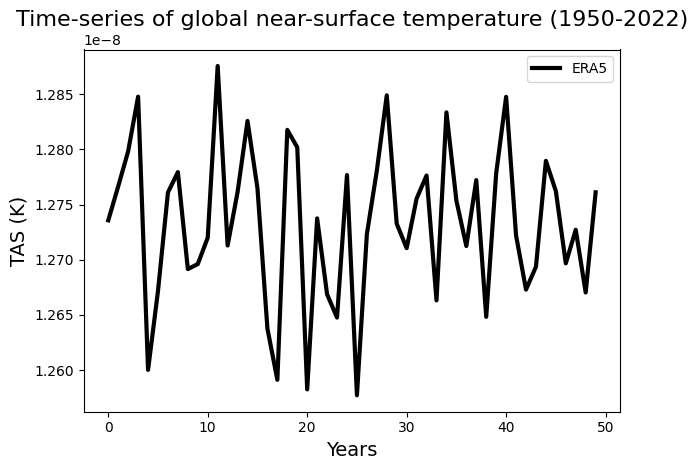

In [5]:
#Plot SST time-series 
plot_tseriesv2(TAS.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title='Time-series of global near-surface temperature (1950-2022)', date=False)

In [6]:
#data_in = TAS.data
mean=compute_mean(TAS.data)
stdev=compute_std(TAS.data, mean)

P_VALUE 0.8695424347828347
SLOPE -1.173805710992892e-13
STD_ERR 7.108773718604379e-13
 


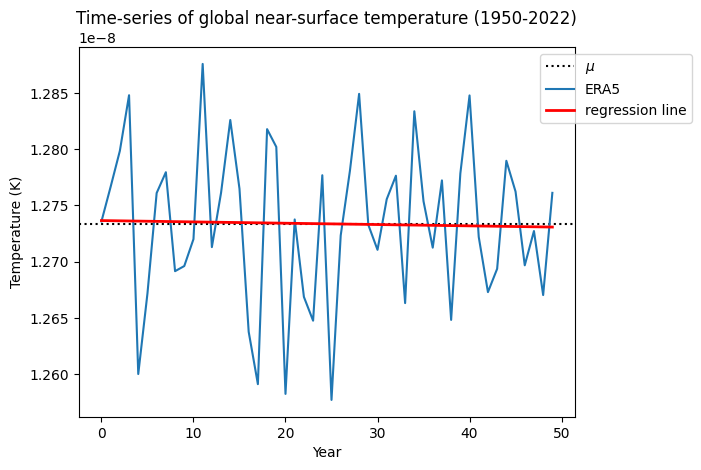

In [9]:
#Plot data with regression line and print out 'slope, std_err, p_value'

plot_tseries(TAS.data, mean, stdev, label='ERA5', color='red',
             linestyle='-', title='Time-series of global near-surface temperature (1950-2022)')

**Obviously, since the p-value is less than compare to $\alpha = 0.05$ we say that the slope of the regression line is statistically significant. However, since I did my own function, lets try it will give the same result.**

In [10]:
slope, std_err, t_score, p_value, t_crit = t_student(TAS.data)

SLOPE my_function: -1.173805710992892e-13
STD_ERR SLOPE my_function: 7.110792386398965e-13
t-score: -0.16507382682667923
critical t-value: 2.0106347546964454
p-value: 0.8695791280395234


In [11]:
# Determine significance
if abs(t_score) > t_crit:
    print("The result of the test is statistically significant.")
else:
    print("The result of the test is not statistically significant.")

The result of the test is not statistically significant.


**As expected, its give the same result.**

### Tropics

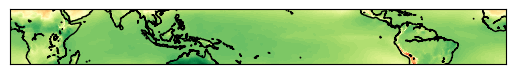

In [10]:
#Extract NINO3.4 area
where='Tropics'
Tropics=extract_areav2(D1, where=where)

In [11]:
#Compute area-weighted annual time series
Tropics_annual = area_weighted(Tropics)
print(Tropics_annual)

2 metre temperature / (K)           (time: 73)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    0.0 degrees, bound=(-23.125, 23.125) degrees
        longitude                   179.875 degrees, bound=(-0.125, 359.875) degrees
    Cell methods:
        0                           time: mean
        1                           latitude: longitude: mean
    Attributes:
        Conventions                 'CF-1.7'


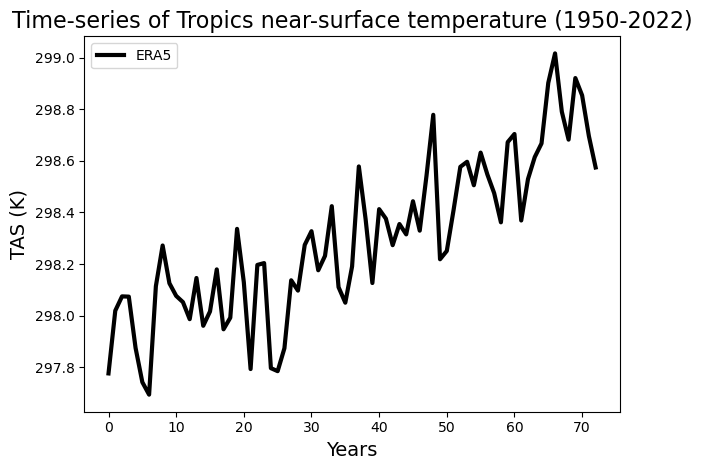

In [12]:
#Plot SST time-series 
plot_tseriesv2(Tropics_annual.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title='Time-series of Tropics near-surface temperature (1950-2022)', date=False)

In [13]:
#data_in = TAS.data
mean=compute_mean(Tropics_annual.data)
stdev=compute_std(Tropics_annual.data, mean)

P_VALUE 2.3893466219735125e-21
SLOPE 0.0123998330823522
STD_ERR 0.0009160686462529841
     


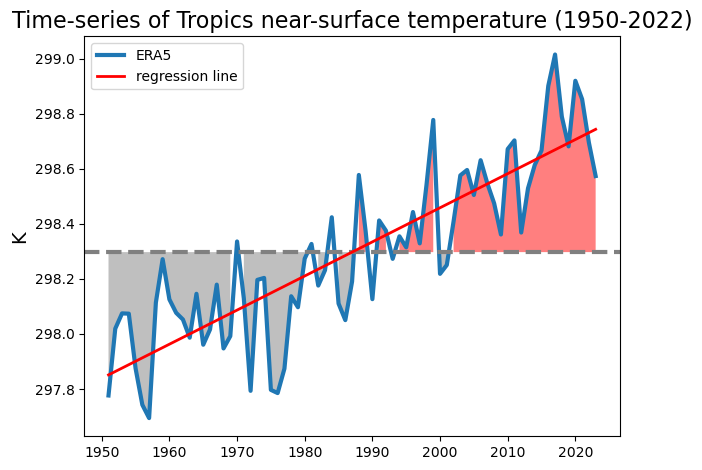

In [14]:
#Plot data with regression line and print out 'slope, std_err, p_value'

plot_tseries_annual(Tropics_annual.data, mean, stdev, label='ERA5', color='red',
             linestyle='-', title='Time-series of Tropics near-surface temperature (1950-2022)')

In [15]:
slope, std_err, t_score, p_value, t_crit = t_student(Tropics_annual.data)

SLOPE my_function: 0.0123998330823522
STD_ERR SLOPE my_function: 0.0017197997160315684
t-score: 7.210044848108692
critical t-value: 1.9934635662785827
p-value: 4.523095987830012e-10


In [16]:
# Determine significance
if abs(t_score) > t_crit:
    print("The result of the test is statistically significant.")
else:
    print("The result of the test is not statistically significant.")

The result of the test is statistically significant.


### NH Extra Tropics

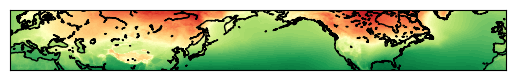

In [17]:
#Extract NINO3.4 area
where='NH Extra Tropics'
NHET=extract_areav2(D1, where=where)

2 metre temperature / (K)           (time: 73)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    44.5 degrees, bound=(22.875, 66.125) degrees
        longitude                   179.875 degrees, bound=(-0.125, 359.875) degrees
    Cell methods:
        0                           time: mean
        1                           latitude: longitude: mean
    Attributes:
        Conventions                 'CF-1.7'


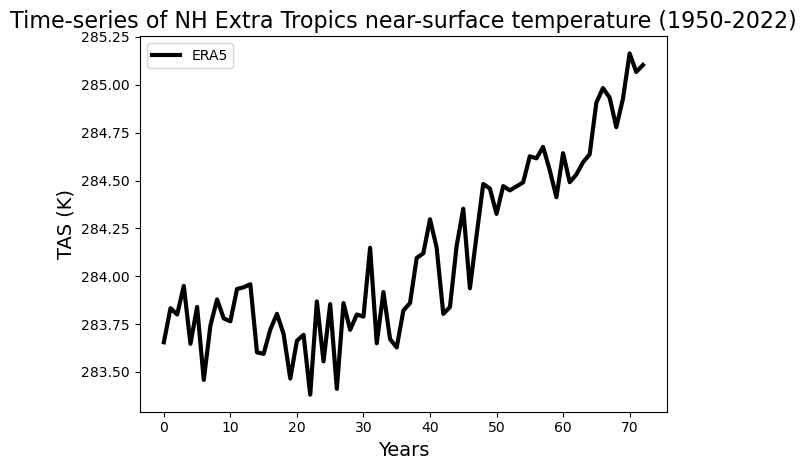

In [18]:
#Compute area-weighted annual time series
NHET_annual = area_weighted(NHET)
print(NHET_annual)

#Plot SST time-series 
plot_tseriesv2(NHET_annual.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Time-series of {where} near-surface temperature (1950-2022)', date=False)

In [19]:
#data_in = TAS.data
mean=compute_mean(NHET_annual.data)
stdev=compute_std(NHET_annual.data, mean)

P_VALUE 7.938377322598225e-23
SLOPE 0.01895473944816703
STD_ERR 0.0013121412935512007
     


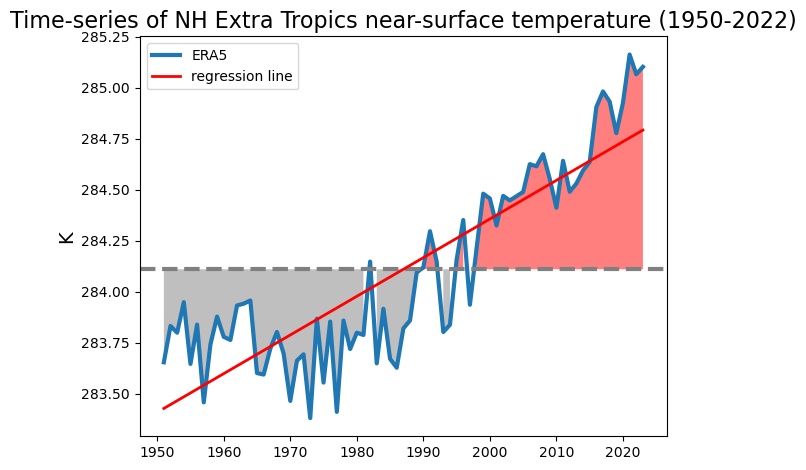

In [20]:
#Plot data with regression line and print out 'slope, std_err, p_value'

plot_tseries_annual(NHET_annual.data, mean, stdev, label='ERA5', color='red',
             linestyle='-', title=f'Time-series of {where} near-surface temperature (1950-2022)')

In [21]:
slope, std_err, t_score, p_value, t_crit = t_student(NHET_annual.data)

SLOPE my_function: 0.01895473944816703
STD_ERR SLOPE my_function: 0.002584513414045717
t-score: 7.3339682994702935
critical t-value: 1.9934635662785827
p-value: 2.665496557888821e-10


In [22]:
# Determine significance
if abs(t_score) > t_crit:
    print("The result of the test is statistically significant.")
else:
    print("The result of the test is not statistically significant.")

The result of the test is statistically significant.


### SH Extra Tropics

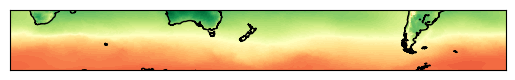

In [23]:
#Extract NINO3.4 area
where='SH Extra Tropics'
SHET=extract_areav2(D1, where=where)

2 metre temperature / (K)           (time: 73)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    -44.5 degrees, bound=(-66.125, -22.875) degrees
        longitude                   179.875 degrees, bound=(-0.125, 359.875) degrees
    Cell methods:
        0                           time: mean
        1                           latitude: longitude: mean
    Attributes:
        Conventions                 'CF-1.7'


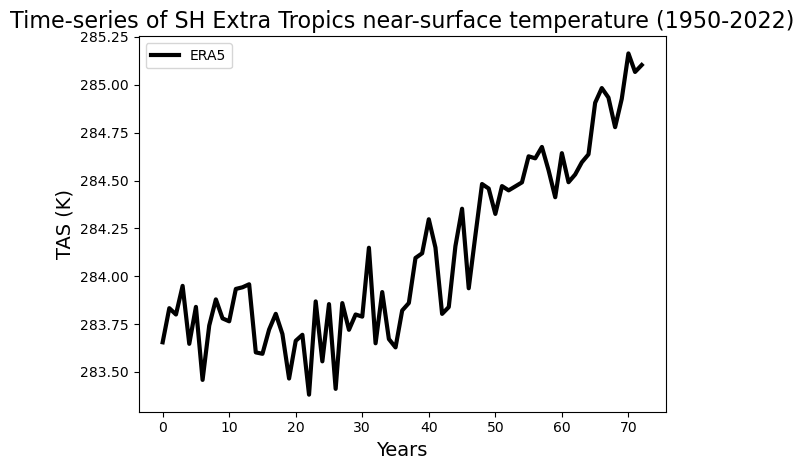

In [24]:
#Compute area-weighted annual time series
SHET_annual = area_weighted(SHET)
print(SHET_annual)

#Plot SST time-series 
plot_tseriesv2(NHET_annual.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Time-series of {where} near-surface temperature (1950-2022)', date=False)

P_VALUE 5.411611908981618e-28
SLOPE 0.009966267793347252
STD_ERR 0.000557548518604591
     


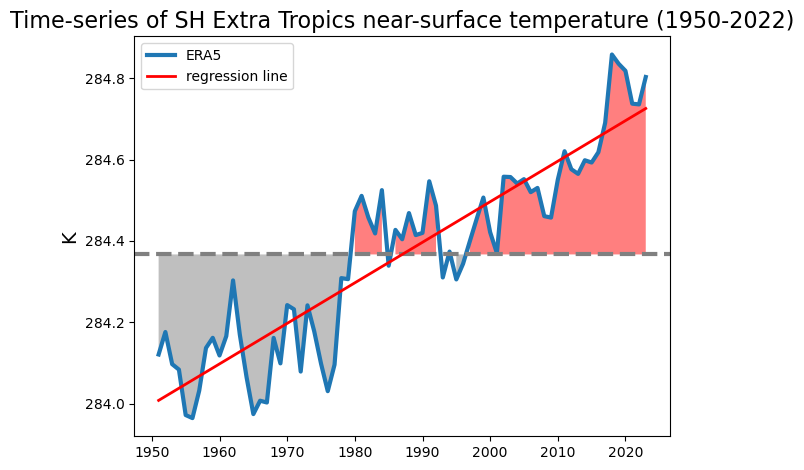

In [25]:
#data_in = TAS.data
mean=compute_mean(SHET_annual.data)
stdev=compute_std(SHET_annual.data, mean)

#Plot data with regression line and print out 'slope, std_err, p_value'

plot_tseries_annual(SHET_annual.data, mean, stdev, label='ERA5', color='red',
             linestyle='-', title=f'Time-series of {where} near-surface temperature (1950-2022)')

In [26]:
slope, std_err, t_score, p_value, t_crit = t_student(SHET_annual.data)

# Determine significance
if abs(t_score) > t_crit:
    print("The result of the test is statistically significant.")
else:
    print("The result of the test is not statistically significant.")

SLOPE my_function: 0.009966267793347253
STD_ERR SLOPE my_function: 0.001296844951579206
t-score: 7.6850110579611215
critical t-value: 1.9934635662785827
p-value: 5.930378936586314e-11
The result of the test is statistically significant.


### Arctic

In [ ]:
lat_min=60
lat_max=90
lon_min=280
lon_max=360

R=iris.Constraint(latitude=lambda  lat: lat_min <= lat <= lat_max, longitude= lambda lon: lon_min <= lon <= lon_max )  
data_out=data_in.extract(R) 

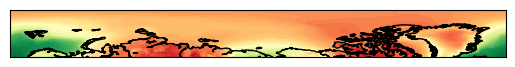

In [27]:
#Extract NINO3.4 area
where='Arctic'
Arc =extract_areav2(D1, where=where)

2 metre temperature / (K)           (time: 73)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    77.9375 degrees, bound=(65.875, 90.0) degrees
        longitude                   179.875 degrees, bound=(-0.125, 359.875) degrees
    Cell methods:
        0                           time: mean
        1                           latitude: longitude: mean
    Attributes:
        Conventions                 'CF-1.7'


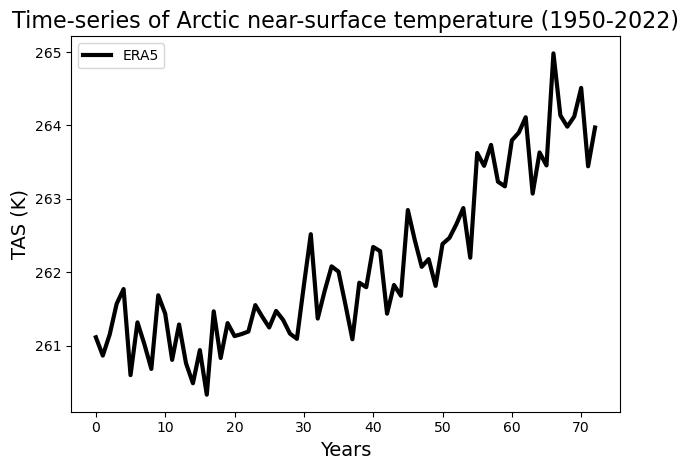

In [28]:
#Compute area-weighted annual time series
Arc_annual = area_weighted(Arc)
print(Arc_annual)

#Plot SST time-series 
plot_tseriesv2(Arc_annual.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Time-series of {where} near-surface temperature (1950-2022)', date=False)

P_VALUE 7.976954116360912e-25
SLOPE 0.04702488099528367
STD_ERR 0.0029909241952146203
     


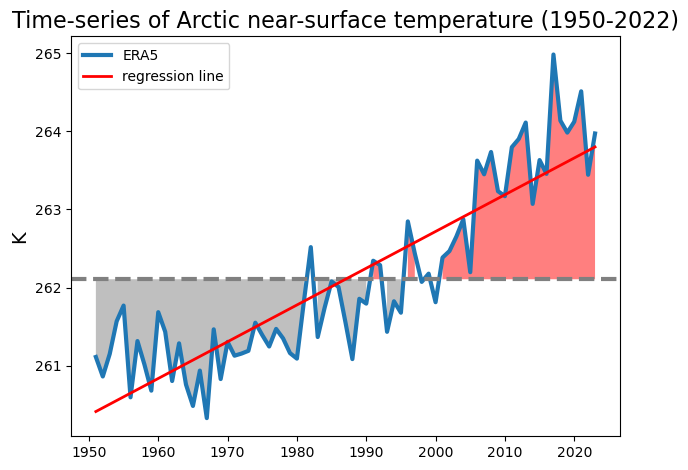

In [29]:
#data_in = TAS.data
mean=compute_mean(Arc_annual.data)
stdev=compute_std(Arc_annual.data, mean)

#Plot data with regression line and print out 'slope, std_err, p_value'

plot_tseries_annual(Arc_annual.data, mean, stdev, label='ERA5', color='red',
             linestyle='-', title=f'Time-series of {where} near-surface temperature (1950-2022)')

In [30]:
slope, std_err, t_score, p_value, t_crit = t_student(Arc_annual.data)

# Determine significance
if abs(t_score) > t_crit:
    print("The result of the test is statistically significant.")
else:
    print("The result of the test is not statistically significant.")

SLOPE my_function: 0.047024880995283694
STD_ERR SLOPE my_function: 0.006286038476262391
t-score: 7.480845237085498
critical t-value: 1.9934635662785827
p-value: 1.4224172042124028e-10
The result of the test is statistically significant.


### Antarctica

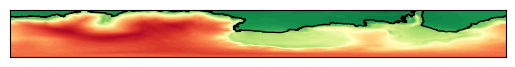

In [31]:
#Extract NINO3.4 area
where='Antarctica'
Ant =extract_areav2(D1, where=where)

2 metre temperature / (K)           (time: 73)
    Dimension coordinates:
        time                             x
    Scalar coordinates:
        latitude                    -77.9375 degrees, bound=(-90.0, -65.875) degrees
        longitude                   179.875 degrees, bound=(-0.125, 359.875) degrees
    Cell methods:
        0                           time: mean
        1                           latitude: longitude: mean
    Attributes:
        Conventions                 'CF-1.7'


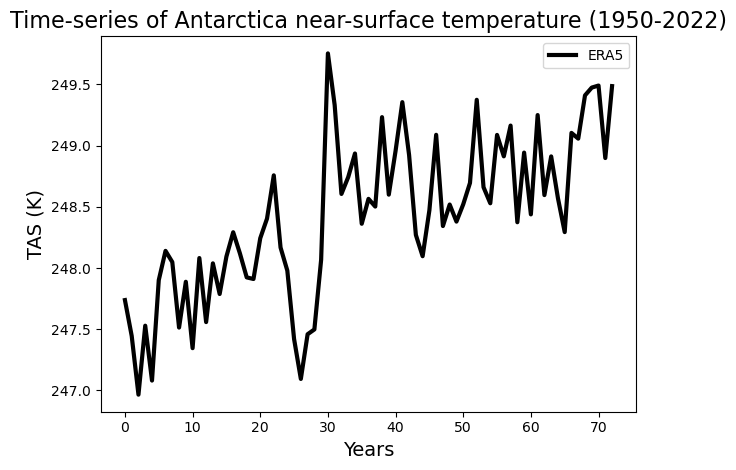

In [32]:
#Compute area-weighted annual time series
Ant_annual = area_weighted(Ant)
print(Ant_annual)

#Plot SST time-series 
plot_tseriesv2(Ant_annual.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Time-series of {where} near-surface temperature (1950-2022)', date=False)

P_VALUE 1.944446743913223e-13
SLOPE 0.022567542118019104
STD_ERR 0.0024952218524450665
     


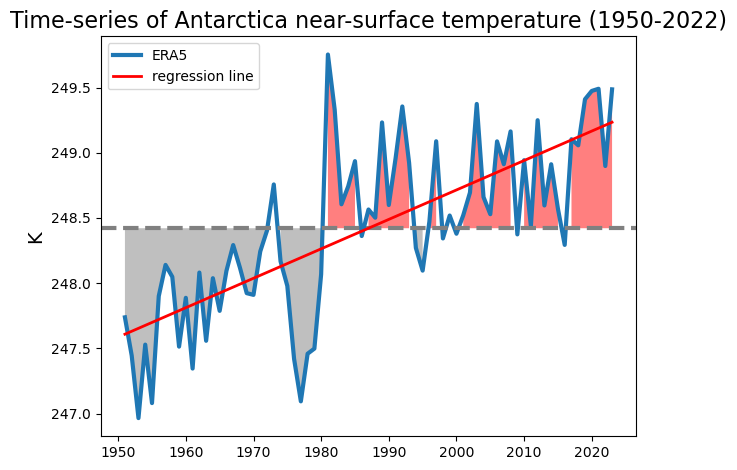

In [33]:
#data_in = TAS.data
mean=compute_mean(Ant_annual.data)
stdev=compute_std(Ant_annual.data, mean)

#Plot data with regression line and print out 'slope, std_err, p_value'

plot_tseries_annual(Ant_annual.data, mean, stdev, label='ERA5', color='red',
             linestyle='-', title=f'Time-series of {where} near-surface temperature (1950-2022)')

In [34]:
slope, std_err, t_score, p_value, t_crit = t_student(Ant_annual.data)

# Determine significance
if abs(t_score) > t_crit:
    print("The result of the test is statistically significant.")
else:
    print("The result of the test is not statistically significant.")

SLOPE my_function: 0.022567542118019104
STD_ERR SLOPE my_function: 0.0036336640993293316
t-score: 6.210684725146833
critical t-value: 1.9934635662785827
p-value: 3.0391705614670945e-08
The result of the test is statistically significant.


#### Comparing all the slope of the regression line

- Tropics: 0.0123998330823522
- NH Extra Tropic: 0.01895473944816703
- SH Extra Tropic: 0.009966267793347252
- Arctic: 0.04702488099528367
- Antartica:  0.022567542118019104

**We can see above that the Arctic region is the one who contribute the most to the global signal** (I'm not sure if this is the reason they have this term **Arctic Amplification**).

## 1D Power Spectrum

### Arctic

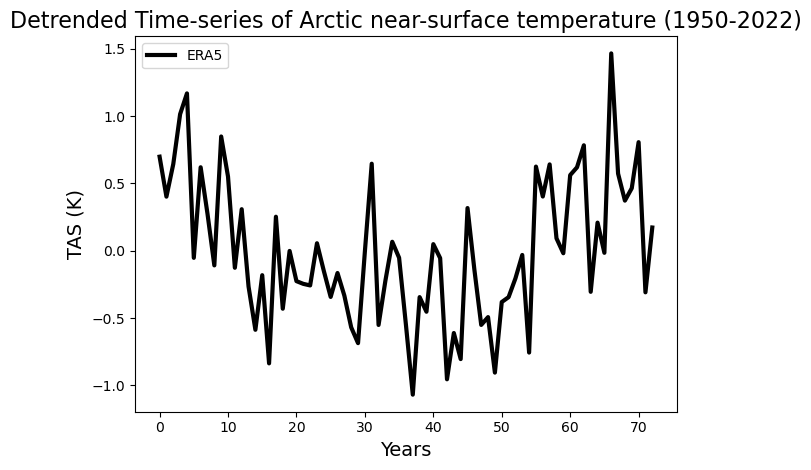

In [35]:
#Detrend the time-series 
where = 'Arctic'
Arc_annual_dt =my_function_to_detrend(Arc_annual)

#Plot SST time-series 
plot_tseriesv2(Arc_annual_dt.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Detrended Time-series of {where} near-surface temperature (1950-2022)', date=False)

In [36]:
#Call functions to compute 1D Power Spectrum (PWS)
S, nk=my_function_to_compute_FFT_1D(Arc_annual_dt.data) 

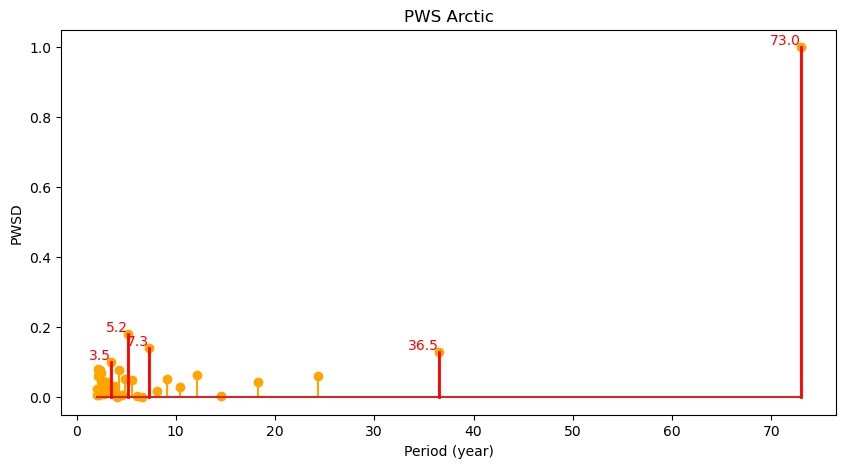

In [37]:
#Function to plot PWS. It takes as arguments the PWS (S), the frequencies (nk), the plot title, 
#and a logical switch: period=False for frequencies on x-axis, period=True for period on x-axis. 
Plot_S_1D(S, nk, title='PWS {where}'.format(where=where), period=True)

plt.show()

**I am not sure if I understand it correctly, but the maximum period is $73$ years, hence there is no variability. This indicate that the strong signal is the warming of Arctic? (If my undestanding is correct, this exercise is interesting, doing those basic things we can see the strong signal of climate change). Aside from that, we can see the natural variability during 36.5, 7.3, 5.2, 3.5 years.** This is cool (not because the climate change :( )!

### Tropic

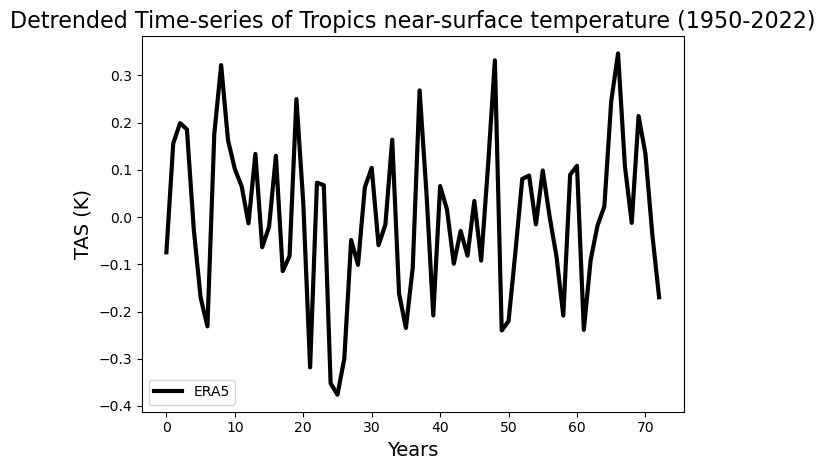

In [38]:
#Detrend the time-series 
Tropics_annual_dt =my_function_to_detrend(Tropics_annual)
where = 'Tropics'
#Plot SST time-series 
plot_tseriesv2(Tropics_annual_dt.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Detrended Time-series of {where} near-surface temperature (1950-2022)', date=False)

In [39]:
#Call functions to compute 1D Power Spectrum (PWS)
S, nk=my_function_to_compute_FFT_1D(Tropics_annual_dt.data) 

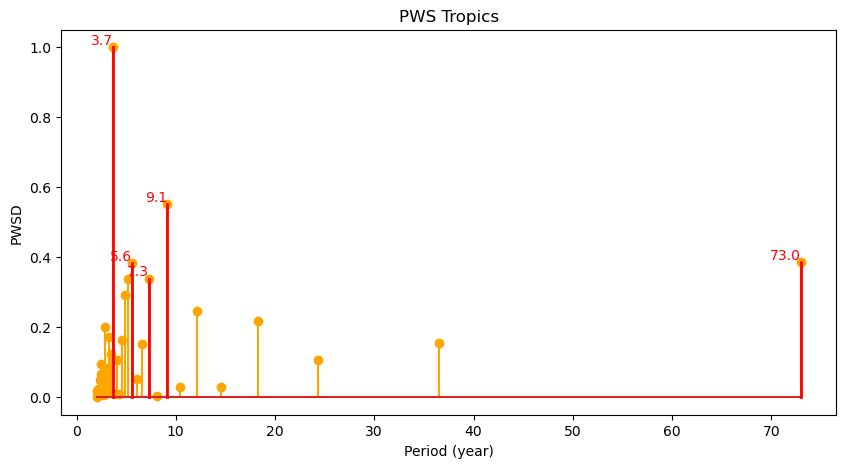

In [40]:
#Function to plot PWS. It takes as arguments the PWS (S), the frequencies (nk), the plot title, 
#and a logical switch: period=False for frequencies on x-axis, period=True for period on x-axis. 
Plot_S_1D(S, nk, title='PWS {where}'.format(where=where), period=True)

plt.show()

### NH Extra Tropics

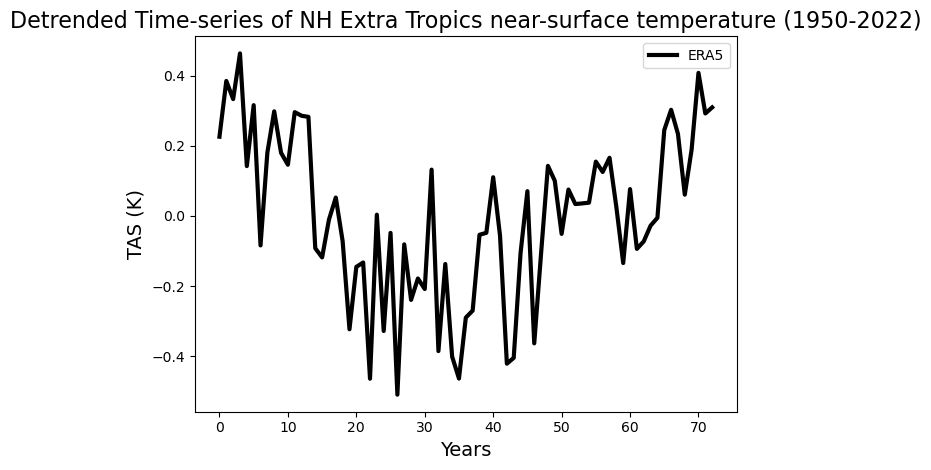

In [41]:
#Detrend the time-series 
NHET_annual_dt =my_function_to_detrend(NHET_annual)
where = 'NH Extra Tropics'
#Plot SST time-series 
plot_tseriesv2(NHET_annual_dt.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Detrended Time-series of {where} near-surface temperature (1950-2022)', date=False)

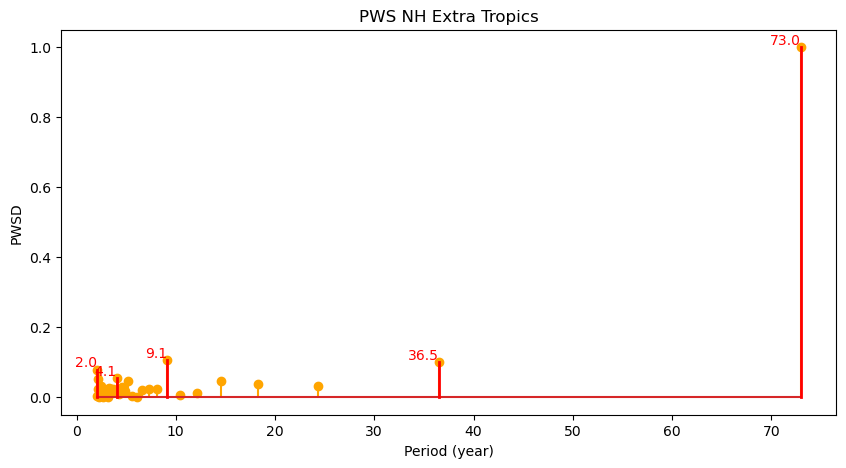

In [42]:
#Call functions to compute 1D Power Spectrum (PWS)
S, nk=my_function_to_compute_FFT_1D(NHET_annual_dt.data) 

#Function to plot PWS. It takes as arguments the PWS (S), the frequencies (nk), the plot title, 
#and a logical switch: period=False for frequencies on x-axis, period=True for period on x-axis. 
Plot_S_1D(S, nk, title='PWS {where}'.format(where=where), period=True)
plt.show()

### SH Extra Tropics

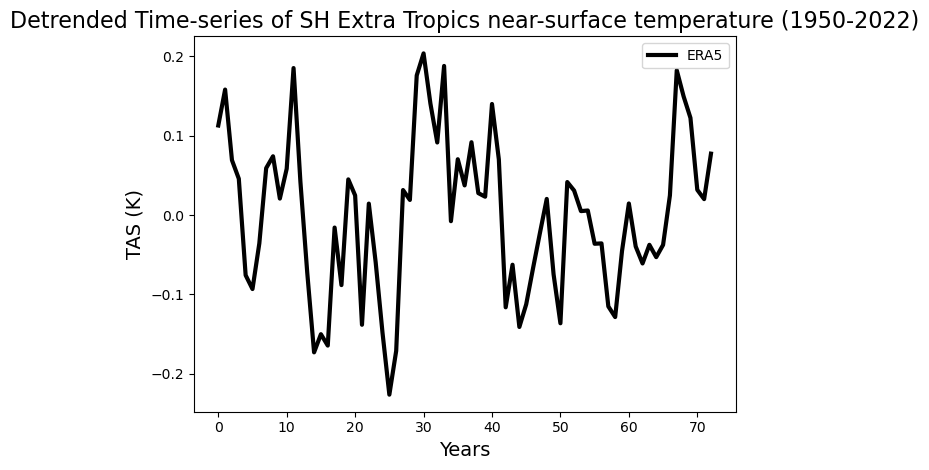

In [43]:
#Detrend the time-series 
SHET_annual_dt =my_function_to_detrend(SHET_annual)
where = 'SH Extra Tropics'
#Plot SST time-series 
plot_tseriesv2(SHET_annual_dt.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Detrended Time-series of {where} near-surface temperature (1950-2022)', date=False)

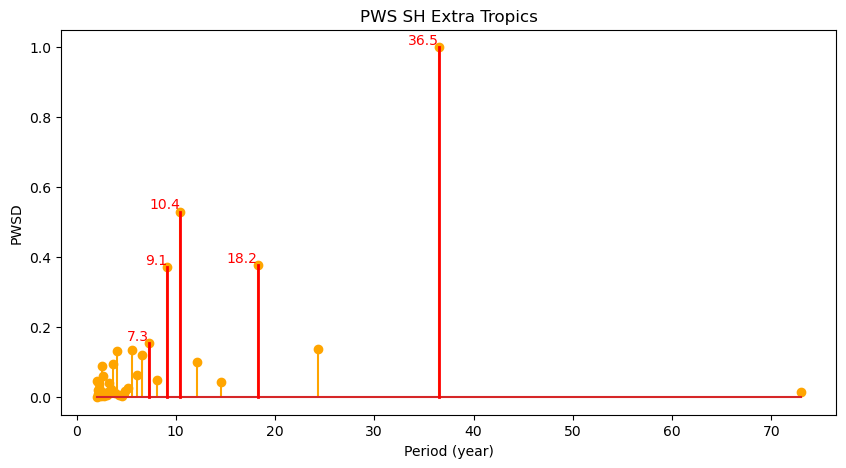

In [44]:
#Call functions to compute 1D Power Spectrum (PWS)
S, nk=my_function_to_compute_FFT_1D(SHET_annual_dt.data) 

#Function to plot PWS. It takes as arguments the PWS (S), the frequencies (nk), the plot title, 
#and a logical switch: period=False for frequencies on x-axis, period=True for period on x-axis. 
Plot_S_1D(S, nk, title='PWS {where}'.format(where=where), period=True)
plt.show()

### Antarctica

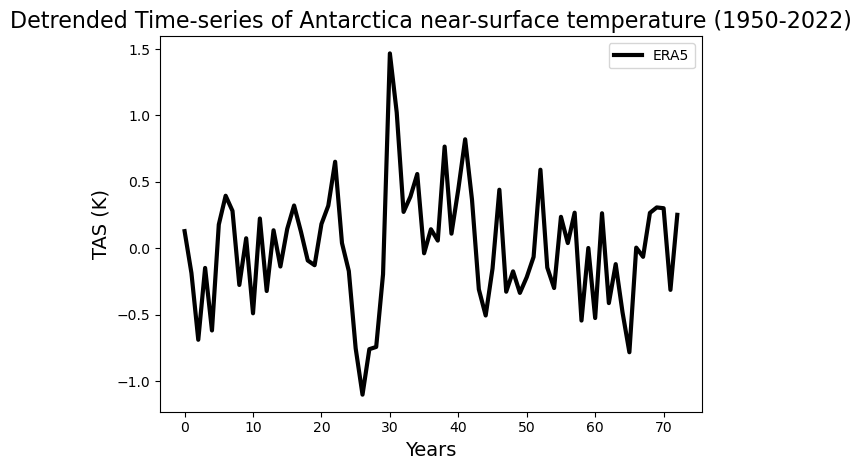

In [45]:
#Detrend the time-series 
Ant_annual_dt =my_function_to_detrend(Ant_annual)
where = 'Antarctica'
#Plot SST time-series 
plot_tseriesv2(Ant_annual_dt.data, label='ERA5', color='black', linestyle='-', xlabel='Years', ylabel='TAS (K)', title=f'Detrended Time-series of {where} near-surface temperature (1950-2022)', date=False)

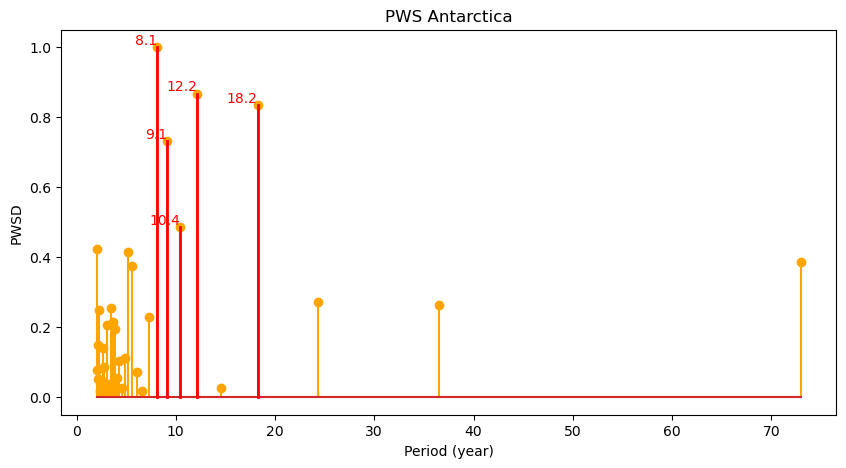

In [46]:
#Call functions to compute 1D Power Spectrum (PWS)
S, nk=my_function_to_compute_FFT_1D(Ant_annual_dt.data) 

#Function to plot PWS. It takes as arguments the PWS (S), the frequencies (nk), the plot title, 
#and a logical switch: period=False for frequencies on x-axis, period=True for period on x-axis. 
Plot_S_1D(S, nk, title='PWS {where}'.format(where=where), period=True)
plt.show()